<a href="https://colab.research.google.com/github/abhi4143/deep_learning/blob/Assessment---1/Assessment_1_question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/abhi4143/deep_learning/tree/Assessment---1
20MAI0005_Abhishek_Kumar

In [ ]:
# Import the numpy , matplotlib and pandas packages
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Drive already mounted 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing dataset
dataset =pd.read_csv("/content/drive/MyDrive/dataset/loan.csv")

In [ ]:
# Check the number of rows and columns in the dataframe
dataset.shape

(10000, 14)

In [ ]:
# Get a summary of the dataframe using 'head'
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [ ]:
 #Get a summary of the dataframe using 'tail'
dataset.tail()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN
9999,9999,25584.0,17.1456,D,Accountant,>5 years,MORTGAGE,72000.0,2015-01-19,0,Debt consolidation,5.0,2016-01-16,NaN


In [ ]:
# Continous Variables
dataset['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

In [ ]:
#Checking for unique dataset
dataset['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

In [ ]:
#Checking for unique dataset
dataset['target'].unique()

array([0, 1])

In [ ]:
#Checking for unique dataset
dataset['number_open_accounts'].unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

In [ ]:
#Checking for unique dataset
dataset['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

In [ ]:
#Counting the number of householder
dataset['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [ ]:
#Checking for datatype
dataset[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [ ]:
#After analysing the data we come to conclusion
#Creating new column 'date_issued_dt'
dataset['date_issued_dt'] = pd.to_datetime(dataset['date_issued'])

In [ ]:
#After analysing the data we come to conclusion
#Creating new column 'date_last_payment_dt'
#Data cleaning
dataset['date_last_payment_dt'] = pd.to_datetime(dataset['date_last_payment'])

In [ ]:
# To get the year in which loan was taken
#Craeted a new columnn year
dataset['year']= dataset['date_issued_dt'].dt.year

In [ ]:
# To get the month in which loan was taken
#Craeted a new columnn month
dataset['month']= dataset['date_issued_dt'].dt.month

In [ ]:
# To check the chnage is applied or not
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,year,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14,2013,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25,2014,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26,2013,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26,2015,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11,2014,7


In [ ]:
#Checking for the shape
dataset.shape

(10000, 18)

In [ ]:
#Spliting the data into X and Y
#For train and test
X=dataset.iloc[:, [0,1,2,7,11,16,17]].values
y=dataset.iloc[:,9].values

In [ ]:
#Splitting into train and test set
#Train 90% Test 10%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [ ]:
#Importing Perceptron
from sklearn.linear_model import Perceptron
per1=Perceptron(random_state=0)

In [ ]:
per1.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred1=per1.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred1)*100

Accuracy score


98.8

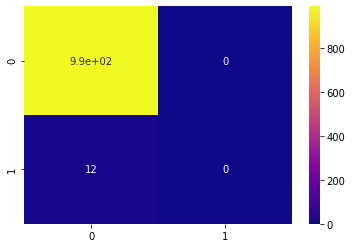

In [ ]:
#Ploting heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1=confusion_matrix(y_test,pred1)
sns.heatmap(cm1, cmap="plasma",annot=True)

In [ ]:
#Splitting into train and test set
#Train 80% Test 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import Perceptron
per2=Perceptron(random_state=0)

In [ ]:
per2.fit(X_train,y_train)
pred2=per2.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred2)*100

Accuracy score


99.1

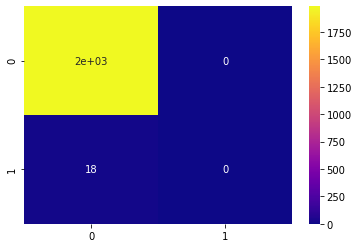

In [ ]:
#Ploting heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2=confusion_matrix(y_test,pred2)
sns.heatmap(cm2, cmap="plasma",annot=True)

In [ ]:
#Splitting into train and test set
#Train 70% Test 30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [ ]:
from sklearn.linear_model import Perceptron
per3=Perceptron(random_state=0)

In [ ]:
per3.fit(X_train,y_train)
pred3=per3.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred3)*100

Accuracy score


80.63333333333334

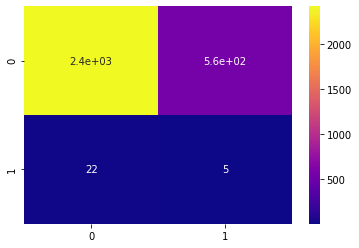

In [ ]:
#Ploting heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm3=confusion_matrix(y_test,pred3)
sns.heatmap(cm3, cmap="plasma",annot=True)

In [ ]:
#Splitting into train and test set
#Train 60% Test 40%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state =0)

In [ ]:
from sklearn.linear_model import Perceptron
per4=Perceptron(random_state=0)

In [ ]:
per4.fit(X_train,y_train)
pred4=per4.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred4)*100

Accuracy score


99.05000000000001

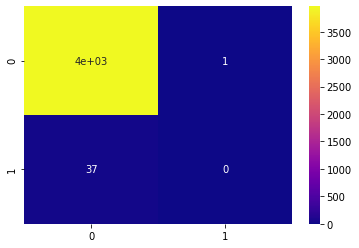

In [ ]:
#Ploting heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm4=confusion_matrix(y_test,pred4)
sns.heatmap(cm4, cmap="plasma",annot=True)

In [ ]:
#Splitting into train and test set
#Train 50% Test 50%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.5, random_state =0)

In [ ]:
from sklearn.linear_model import Perceptron
per5=Perceptron(random_state=0)

In [ ]:
per5.fit(X_train,y_train)
pred5=per5.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred5)*100

Accuracy score


99.0

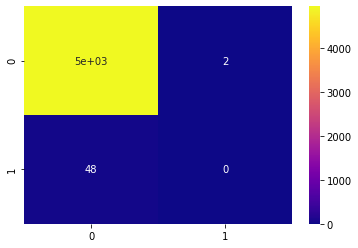

In [ ]:
#Ploting heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm5=confusion_matrix(y_test,pred5)
sns.heatmap(cm5, cmap="plasma",annot=True)

After applying the Perceptron.
1. Then we have split the data into #Train 90% Test 10%,then the Accuracy score 98.8

2. Then we have split the data into #Train 80% Test 20%,then the Accuracy score 99.1.

3. Then we have split the data into #Train 70% Test 30% ,then the  Accuracy score 80.63333333333334.

4. Then we have split the data into #Train 60% Test 40% ,then the Accuracy score 99.05000000000001.

5. Then we have split the data into #Train 50% Test 50%, then the Accuracy score 99.0.

We have even plotted the heatmap for better observation and analysis.


